In [2]:
# Import some packages and modules needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Directory of the data.
path = "../data/"

In [13]:
train_df = pd.read_csv(path+"train.csv")
test_df = pd.read_csv(path+"test.csv")


print(train_df.head())
print()
print(train_df.info())
print()
print(train_df.describe())

   id  annual_income  debt_to_income_ratio  credit_score  loan_amount  \
0   0       29367.99                 0.084           736      2528.42   
1   1       22108.02                 0.166           636      4593.10   
2   2       49566.20                 0.097           694     17005.15   
3   3       46858.25                 0.065           533      4682.48   
4   4       25496.70                 0.053           665     12184.43   

   interest_rate  gender marital_status education_level employment_status  \
0          13.67  Female         Single     High School     Self-employed   
1          12.92    Male        Married        Master's          Employed   
2           9.76    Male         Single     High School          Employed   
3          16.10  Female         Single     High School          Employed   
4          10.21    Male        Married     High School          Employed   

         loan_purpose grade_subgrade  loan_paid_back  
0               Other             C3       

In [42]:
Columns_obj = train_df.select_dtypes(include='object').columns
Columns_num = train_df.select_dtypes(exclude='object').columns

Columns_num = Columns_num.drop('id')
Columns_num

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'loan_paid_back'],
      dtype='object')

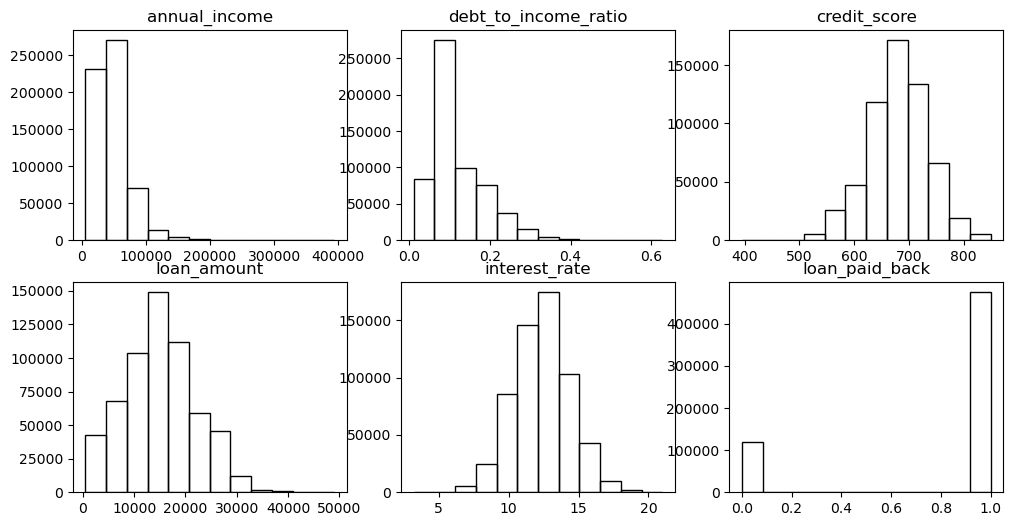

In [55]:
bin = 12

fig, ax = plt.subplots(2, 3, figsize=(12,6))
for i in range(2):
    for j , c in enumerate(Columns_num[3*i:3*(i+1)]):
        ax[i,j].set_title(c)
        ax[i,j].hist(train_df[c], 
                    bin, density=False, 
                    fill=False)

plt.show(fig)


In [79]:
S = train_df['grade_subgrade'].value_counts()


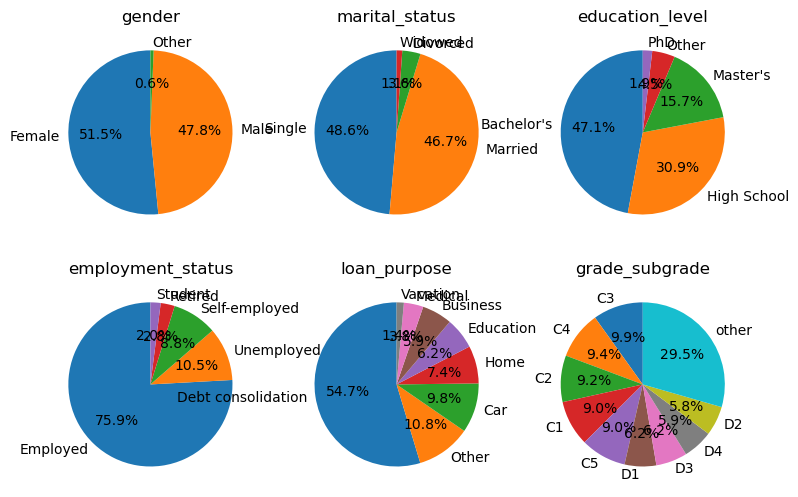

In [106]:
def top_values(data ,size = 'int'):
    if len(pd.unique(data)) > size :
        d = data.value_counts()
        #d = d[:size]
        Other = pd.Series({'other': d[size:].sum()})
        D = pd.concat([d[:size], Other], axis=0)
        return D
    else:
        return data.value_counts()

'''
D = top_values(train_df['gender'],9)
print(D)

'''
Fig, Ax = plt.subplots(2, 3, figsize=(9,6))
for i in range(2):
    for j , c in enumerate(Columns_obj[3*i:3*(i+1)]):
        Ax[i,j].set_title(c)
        D = top_values(train_df[c],9)
        Ax[i,j].pie(D.values,
                    labels=D.index, 
                    autopct='%1.1f%%', 
                    shadow=False, 
                    startangle=90)

plt.show()
